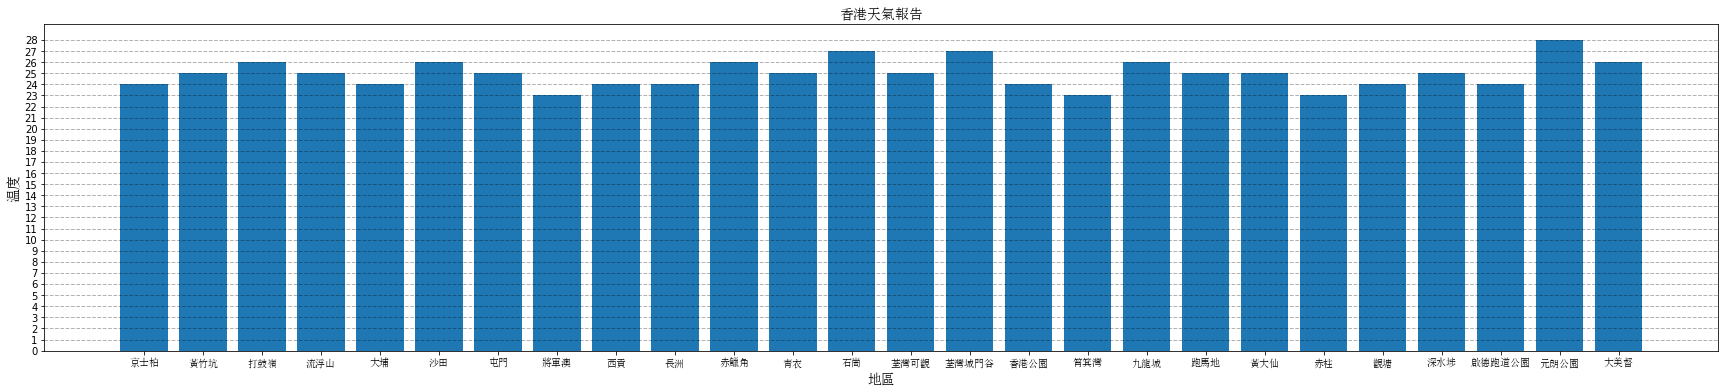

In [20]:
#import setting
%matplotlib inline
import time
import numpy as np
import matplotlib.pyplot as plt #download this library
from matplotlib.font_manager import FontProperties 
from selenium import webdriver #open googledriver
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 
from selenium.webdriver.support.ui import Select
from openpyxl import Workbook, load_workbook 
from openpyxl.utils import get_column_letter
from matplotlib.lines import Line2D
import datetime
import re

#function setting
def xPathSearch(xpath1):
    xpath2 = driver.find_element_by_xpath(xpath1)
    return(xpath2)
    

#web driver setting
PATH = "chromedriver"
driver = webdriver.Chrome(PATH)
link = "http://www.hko.gov.hk/tc/wxinfo/currwx/current.htm"
driver.get(link)   


#workbook setting
wb = Workbook() # open a workbook on python
ws = wb.active # switch to the active worksheet
ws.title = "香港天氣報告" # change worksheet name
ws["A1"] = "地區:"
ws["B1"] = "温度:"

#plt setting
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14) #change to chinese

#get data + append to excel
number = 2
titles = xPathSearch('//*[@id="main_content"]/div[1]').text
titles = titles.split("度，\n")
titlesLen = len(titles)
for i in titles:
    ws["B" + str(number)].value = int(re.findall(r'\d+',i)[0])
    ws["A" + str(number)].value = str(re.findall(r'\D+',i)[0])
    number += 1

#value setting
number = 1
x = []
y = []
y1 = []
y2 = []
xtick = []
for i in range(2,titlesLen+2):
    x.append(number)
    y.append(ws["B"+str(i)].value)
    xtick.append(ws["A"+str(i)].value)
    number += 1
number = 0
for i in range(1,max(y)+2):
    y1.append(number)
    y2.append(str(number))
    number += 1
    
#draw a picture
plt.figure(figsize = (30,6))
plt.yticks(y1,y2)
plt.xticks(x,xtick,fontproperties=font,fontsize = "10") 
plt.grid(axis='y',color='k', linestyle='--', alpha = 0.3, linewidth=1) 
plt.xlabel("地區",fontproperties=font)
plt.ylabel("温度",fontproperties=font)
plt.title("香港天氣報告",fontproperties=font)
plt.bar(x,y)

#end
wb.save("香港天氣報告.xlsx")